<a href="https://colab.research.google.com/github/SenaCansabuncu/Python_Code/blob/master/Fraud_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve,average_precision_score,precision_score,recall_score
from sklearn.metrics import classification_report
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import itertools
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
import os

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 

**Read** **File** 

In [0]:
df_total = pd.DataFrame()
print(df_total.shape)


#df_total=pd.read_csv('../content/train-v3.csv', header=0)
df_total=pd.read_csv('../train-v3.csv', header=0)

print(df_total.shape)



(0, 0)
(1048575, 12)


**Data Analysis**


kontrol False
Size = 12582900
Shape =(1048575, 12)

Missing value control: False 



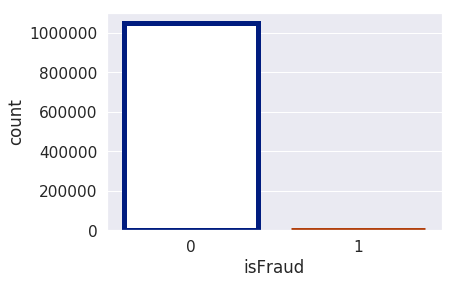

0    1048538
1         37
Name: isFraud, dtype: int64

In [0]:

print("kontrol",df_total.dropna().empty)
# dataframe.size 
total_size = df_total.size 
  
# dataframe.shape 
total_shape = df_total.shape 

print("Size = {}\nShape ={}\n". 
format(total_size, total_shape, total_shape[0]*total_shape[1])) 


#Control missing data
Empty_df=df_total.empty

print("Missing value control:", Empty_df,"\n")

 

#Grouping_Is_Fraud_DF=df_total.groupby('isFraud').count().iloc[:,1]

#print(Grouping_Is_Fraud_DF)


# Finding index of fraud records
#Index_Of_Fraud=df_total.index.get_indexer_for((df_total[df_total.isFraud == 1].index))


#Control count of Fraud data  
sns.countplot(x='isFraud',data=df_total,facecolor=(1, 1, 1, 1),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 5))
plt.show()
df_total['isFraud'].value_counts()

#print(Index_Of_Fraud)


**Train and Test Data Preparation**

In [0]:
# Train data prep------------------------------------------------


is_not_frd=df_total['isFraud']==0

print("is not fraud:", is_not_frd.shape)
df_train_not_fraud=df_total[is_not_frd].iloc[0:500000]
print("is not fraud:",df_train_not_fraud.shape)

is_frd =df_total['isFraud']==1
df_train_fraud=df_total[is_frd].iloc[0:15]
print("is fraud:",df_train_fraud.shape)
df_total_train=pd.concat([df_train_not_fraud,df_train_fraud],ignore_index=True)

print("Train data set\n", df_total_train.head())


is not fraud: (1048575,)
is not fraud: (500000, 12)
is fraud: (15, 12)
Train data set
    Id  step    action     amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0   0     0  TRANSFER     10.000  C0198526315       30112.000       30102.000   
1   1     1   CASH_IN 104925.190  C9864462944          42.230      104967.410   
2   2     1   CASH_IN  37383.170  C1474610910          49.830       37433.010   
3   3     1   CASH_IN 131908.490  C1474610910       37433.010      169341.490   
4   4     1   CASH_IN 127105.650  C1474610910      169341.490      296447.140   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  C4653045645       21927.840       21937.840        0               0  
1  C7853342674           0.000           0.000        0               0  
2  C3584357969           0.000           0.000        0               0  
3  C4996589500           0.000           0.000        0               0  
4  C5989915138           0.000           0.000        0 

In [0]:
# Test data prep------------------------------------------------
df_test_is_not_frd=df_total[is_not_frd].iloc[500000:1048575]
print("is not fraud\n",df_test_is_not_frd.shape)

df_test_is_frd=df_total[is_frd].iloc[15:]
print("is fraud\n",df_test_is_frd.shape)
df_total_test=pd.concat([df_test_is_not_frd,df_test_is_frd],ignore_index=True)

print("Test data set\n", df_total_test.head())


is not fraud
 (548538, 12)
is fraud
 (22, 12)
Test data set
        Id  step    action     amount     nameOrig  oldBalanceOrig  \
0  707161    40   PAYMENT   5777.610  C2557444903     1716634.170   
1  707162    40  CASH_OUT 124490.380  C3243895863     3946440.420   
2  707163    40  CASH_OUT 240525.600  C3243895863     3821950.040   
3  707164    40   PAYMENT   7554.580  C3243895863     3581424.440   
4  707165    40   CASH_IN 182141.240  C3243895863     3573869.850   

   newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
0     1710856.560  C2047268307       12938.470       18716.080        0   
1     3821950.040  C3709962396       11264.010       11264.010        0   
2     3581424.440  C5296560478       28789.470       28789.470        0   
3     3573869.850  C2060253535       13093.120       20647.710        0   
4     3756011.100  C9826470683       69865.800       69865.800        0   

   isFlaggedFraud  
0               0  
1               0  
2            

 **Transform character columns into numeric**

In [0]:
# TURN CHARACTER VALUES INTO NUMERICS
lb_make = LabelEncoder()
df_total_train["nameOrig_num"] = lb_make.fit_transform(df_total_train["nameOrig"])
#print(df_train_f1[["nameOrig_num","nameOrig"]])
df_total_train["nameDest_num"] = lb_make.fit_transform(df_total_train["nameDest"])
df_total_train["action_num"] = lb_make.fit_transform(df_total_train["action"])
print(df_total_train.head())

##-------------------------------------------
df_total_test["nameOrig_num"] = lb_make.fit_transform(df_total_test["nameOrig"])
#print(df_train_f1[["nameOrig_num","nameOrig"]])
df_total_test["nameDest_num"] = lb_make.fit_transform(df_total_test["nameDest"])
df_total_test["action_num"] = lb_make.fit_transform(df_total_test["action"])

print(df_total_test.head())

   Id  step    action     amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0   0     0  TRANSFER     10.000  C0198526315       30112.000       30102.000   
1   1     1   CASH_IN 104925.190  C9864462944          42.230      104967.410   
2   2     1   CASH_IN  37383.170  C1474610910          49.830       37433.010   
3   3     1   CASH_IN 131908.490  C1474610910       37433.010      169341.490   
4   4     1   CASH_IN 127105.650  C1474610910      169341.490      296447.140   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  \
0  C4653045645       21927.840       21937.840        0               0   
1  C7853342674           0.000           0.000        0               0   
2  C3584357969           0.000           0.000        0               0   
3  C4996589500           0.000           0.000        0               0   
4  C5989915138           0.000           0.000        0               0   

   nameOrig_num  nameDest_num  action_num  
0           270   

**Adding new columns for train data**

In [0]:

 #Calculating mean amount each sender customer
  
grouped = df_total_train['amount'].groupby(df_total_train['nameOrig_num'])
grouped = grouped.mean()

df_mean_amount_orig=pd.DataFrame(grouped)

#print("mean amount",df_mean_amount.head())



# Calculating Standart deviation amount each sender customer

grouped = df_total_train['amount'].groupby(df_total_train['nameOrig_num'])
grouped = grouped.std(ddof=0)

df_std=pd.DataFrame(grouped)

#print("standard deviation",df_std.head())


# calculating number of destination customer each sender customer. 
grouped = df_total_train['nameDest_num'].groupby(df_total_train['nameOrig_num'])

grouped = grouped.count()

df_count_of_trans=pd.DataFrame(grouped)

#print("number of transaction",df_count_of_trans.head())



 #Calculating mean amount each receiver customer
  
grouped = df_total_train['amount'].groupby(df_total_train['nameDest_num'])
grouped = grouped.mean()
df_mean_amount_desc=pd.DataFrame(grouped)
#print("mean amount",df_mean_amount.head())



# calculating number of transaction at the same time each receiver customer.
#grouped=df_total_train.groupby(['nameOrig_num','step'])['nameDest_num']

#grouped=grouped.count()
#df_count_of_trns_same_time=pd.DataFrame(grouped)
#print("number of transaction at the same time:",df_count_of_trns_same_time)


df_total_train = df_total_train.merge(df_mean_amount_orig, on=['nameOrig_num'], suffixes=('', '_Mean_Orig'))
df_total_train = df_total_train.merge(df_std, on=['nameOrig_num'], suffixes=('', '_std'))
df_total_train = df_total_train.merge(df_mean_amount_desc, on=['nameDest_num'], suffixes=('', '_Mean_Desc'))
df_total_train = df_total_train.merge(df_count_of_trans, on=['nameOrig_num'], suffixes=('', '_count_of_trnsc'))

#df_total_train = df_total_train.merge(df_count_of_trns_same_time,on=['nameOrig_num','step'], suffixes=('', '_count_of_trnsc_same_time'))
print (df_total_train.head())






       Id  step    action     amount     nameOrig  oldBalanceOrig  \
0       0     0  TRANSFER     10.000  C0198526315       30112.000   
1  214068    14   CASH_IN  17696.870  C0198526315       30102.000   
2   14125     7  TRANSFER     20.000  C6369346098      168517.420   
3  203332    13  CASH_OUT 204509.780  C6369346098     2448060.070   
4  310007    16  CASH_OUT 194400.580  C6369346098     2251638.170   

   newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
0       30102.000  C4653045645       21927.840       21937.840        0   
1       47798.870  C7929742496           0.000           0.000        0   
2      168497.420  C4653045645       21977.840       21997.840        0   
3     2243550.290  C4837797063       16780.720       16780.720        0   
4     2057237.590  C6307476824           0.000           0.000        0   

   isFlaggedFraud  nameOrig_num  nameDest_num  action_num  amount_Mean_Orig  \
0               0           270         21925          

Test Data

In [0]:


 #Calculating mean amount each sender customer
  
grouped = df_total_test['amount'].groupby(df_total_test['nameOrig_num'])
grouped = grouped.mean()
df_mean_amount_orig=pd.DataFrame(grouped)
#print("mean amount",df_mean_amount.head())




# Calculating Standart deviation amount each sender customer

grouped = df_total_test['amount'].groupby(df_total_test['nameOrig_num'])
grouped = grouped.std(ddof=0)
df_std=pd.DataFrame(grouped)
#print("standard deviation",df_std.head())



# Calculating number of destination customer each sender customer. 

grouped = df_total_test['nameDest_num'].groupby(df_total_test['nameOrig_num'])
grouped = grouped.count()
df_count_of_trans=pd.DataFrame(grouped)
#print("number of transaction",df_count_of_trans.head())




 #Calculating mean amount each receiver customer
  
grouped = df_total_test['amount'].groupby(df_total_test['nameDest_num'])
grouped = grouped.mean()
df_mean_amount_desc=pd.DataFrame(grouped)
#print("mean amount",df_mean_amount.head())


# calculating number of transaction at the same time each receiver customer.
#grouped=df_total_test.groupby(['nameOrig_num','step'])['nameDest_num']

#grouped=grouped.count()
#df_count_of_trns_same_time=pd.DataFrame(grouped)
#print("number of transaction at the same time:",df_count_of_trns_same_time)


df_total_test = df_total_test.merge(df_mean_amount_orig, on=['nameOrig_num'], suffixes=('', '_Mean_Orig'))
df_total_test = df_total_test.merge(df_mean_amount_desc, on=['nameDest_num'], suffixes=('', '_Mean_Desc'))
df_total_test = df_total_test.merge(df_std, on=['nameOrig_num'], suffixes=('', '_std'))
df_total_test = df_total_test.merge(df_count_of_trans, on=['nameOrig_num'], suffixes=('', '_count_of_trnsc'))

#df_total_test = df_total_test.merge(df_count_of_trns_same_time,on=['nameOrig_num','step'], suffixes=('', '_count_of_trnsc_same_time'))
print (df_total_test.head())


        Id  step   action     amount     nameOrig  oldBalanceOrig  \
0   707161    40  PAYMENT   5777.610  C2557444903     1716634.170   
1   844672    44  CASH_IN  68978.030  C2557444903     1710856.560   
2  1039979   136  CASH_IN  67838.210  C2557444903     1779834.590   
3  1089831   138  CASH_IN 128970.650  C2557444903     1847672.800   
4  1089832   138  PAYMENT   8197.180  C2557444903     1976643.460   

   newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
0     1710856.560  C2047268307       12938.470       18716.080        0   
1     1779834.590  C8247068973       47289.550       47289.550        0   
2     1847672.800  C1170173570       38727.030       38727.030        0   
3     1976643.460  C8524020454       33548.810       33548.810        0   
4     1968446.280  C1912319066       28919.960       37117.140        0   

   isFlaggedFraud  nameOrig_num  nameDest_num  action_num  amount_Mean_Orig  \
0               0          3515         10674          

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average precision-recall score: 0.72


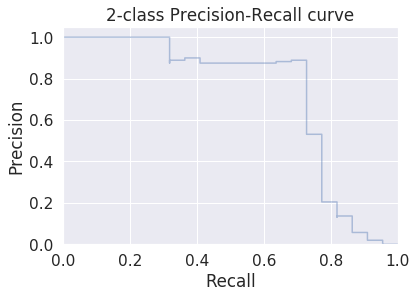

In [0]:

lister_4=['step', 'amount', 'oldBalanceOrig','newBalanceOrig', 'oldBalanceDest', 'newBalanceDest',
'isFlaggedFraud', 'nameOrig_num', 'nameDest_num','action_num', 'amount_Mean_Orig', 'amount_std',
'nameDest_num_count_of_trnsc','amount_Mean_Desc']
lister_5=['isFraud']
X_train=df_total_train[lister_4] # train df
y_train=df_total_train[lister_5] # Fraud train df
X_test=df_total_test[lister_4]  #test df 
y_test=df_total_test[lister_5]  #true fruad value for test

# Create parameters to searc
params ={
    # Parameters that we are going to tune.
    'n_estimators':10,
    'max_depth': 2, #Result of tuning with CV
    'eta':0.03, #Result of tuning with CV
}
model = xgb.XGBClassifier(params=params)

# Training the models
model.fit(X_train, y_train)


#Predict_proba will give the only probability of 1.
y_pred = model.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:,1])

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)


average_precision = average_precision_score(y_test,  y_pred[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()





In [0]:


lister_4=['step', 'amount', 'oldBalanceOrig','newBalanceOrig', 'oldBalanceDest', 'newBalanceDest',
'isFlaggedFraud', 'nameOrig_num', 'nameDest_num','action_num', 'amount_Mean_Orig', 'amount_std',
'nameDest_num_count_of_trnsc','amount_Mean_Desc']
lister_5=['isFraud']
X_train=df_total_train[lister_4] # train df
y_train=df_total_train[lister_5] # Fraud train df
X_test=df_total_test[lister_4]  #test df 
y_test=df_total_test[lister_5]  #true fruad value for test

# Create parameters to searc
params ={
    # Parameters that we are going to tune.
    'n_estimators':10,
    'max_depth': 2, #Result of tuning with CV
    'eta':0.03, #Result of tuning with CV
}



model = xgb.XGBClassifier(params=params)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

accuracy = accuracy_score(y_test, model.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
my_submission = pd.DataFrame( { 'real_fraud_value': y_test.isFraud,'is_fraud': predictions } )
my_submission.to_csv('sample_submission.csv', index=False)
print("Writing complete")

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 99.92%
Writing complete


In [0]:
print(classification_report(y_test, model.predict(X_test), labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    548538
           1       0.04      0.91      0.08        22

    accuracy                           1.00    548560
   macro avg       0.52      0.95      0.54    548560
weighted avg       1.00      1.00      1.00    548560



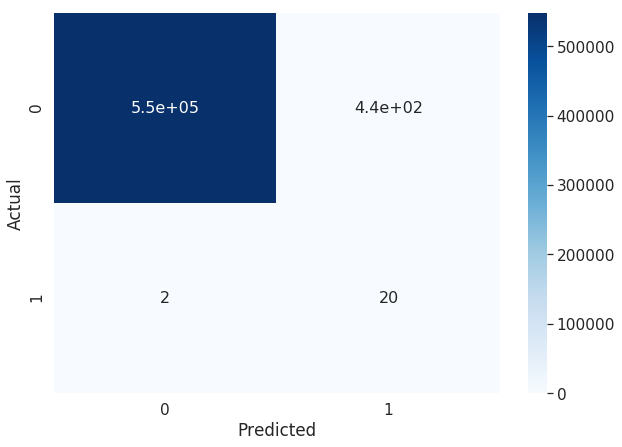

In [0]:
data = confusion_matrix(y_test,model.predict(X_test))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size